In [1]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import DictionaryLearning

from adopty.lista import Lista

In [2]:
# Parameters

n_components = 20
lmbd = .3

In [3]:
#Load the data
X, y = load_digits(return_X_y=True)
i0 = np.random.choice(range(len(X)), size=n_components, replace=False)
D_init = X[i0]
D_init /= np.linalg.norm(D_init, axis=1, keepdims=True)
X /= np.max(X.dot(D_init.T),axis=1, keepdims=True)

In [4]:
dl = DictionaryLearning(n_components=n_components, alpha=lmbd, dict_init=D_init, verbose=100, max_iter=50, positive_code=True)
dl.fit(X)

Iteration   0 (elapsed time:   0s,  0.0mn, current cost     nan)
Iteration   1 (elapsed time:   1s,  0.0mn, current cost  1084.819)
Iteration   2 (elapsed time:   2s,  0.0mn, current cost  701.671)
Iteration   3 (elapsed time:   2s,  0.0mn, current cost  675.356)
Iteration   4 (elapsed time:   3s,  0.1mn, current cost  664.527)
Iteration   5 (elapsed time:   4s,  0.1mn, current cost  658.562)
Iteration   6 (elapsed time:   5s,  0.1mn, current cost  654.792)
Iteration   7 (elapsed time:   6s,  0.1mn, current cost  653.288)
Iteration   8 (elapsed time:   6s,  0.1mn, current cost  652.576)
Iteration   9 (elapsed time:   7s,  0.1mn, current cost  652.029)
Iteration  10 (elapsed time:   8s,  0.1mn, current cost  651.552)
Iteration  11 (elapsed time:   9s,  0.2mn, current cost  651.135)
Iteration  12 (elapsed time:  10s,  0.2mn, current cost  650.827)
Iteration  13 (elapsed time:  10s,  0.2mn, current cost  650.630)
Iteration  14 (elapsed time:  11s,  0.2mn, current cost  650.500)
Iteration 

DictionaryLearning(alpha=0.3, code_init=None,
                   dict_init=array([[0.        , 0.        , 0.14443163, ..., 0.18053954, 0.        ,
        0.        ],
       [0.        , 0.        , 0.10264286, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01444731, 0.17336769, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12795921, ..., 0.18482997, 0.04265307,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08935698, 0.        ,
        0.        ]]),
                   fit_algorithm='lars', max_iter=50, n_components=20,
                   n_jobs=None, positive_code=True, positive_dict=False,
                   random_state=None, split_sign=False, tol=1e-08,
                   transform_algorithm='omp', transform_alpha=None,
                   transform_n_nonzero_coefs=None, verbose=100)

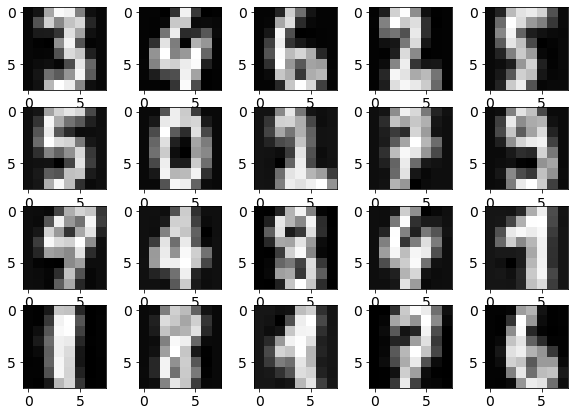

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
for k, dk in enumerate(dl.components_):
    plt.subplot(4, 5, k + 1)
    plt.imshow(dk.reshape(8, 8), cmap='gray')

In [6]:
lista = Lista(n_layers=20, D=D_init, parametrization='dictionary', per_layer='oneshot', max_iter=500)
lista.fit(X, lmbd=lmbd)

[LISTA-20] Fitting model: done                                                 


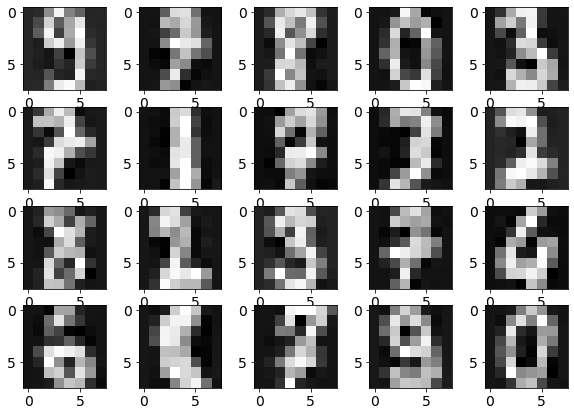

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
for k, dk in enumerate(lista.get_parameters('D_hat')[-1]):
    plt.subplot(4, 5, k + 1)
    plt.imshow(dk.reshape(8, 8), cmap='gray')

In [8]:
lista.score(X, lmbd=lmbd)

array(0.4055362)

In [9]:
D_hat = lista.get_parameters('D_hat')[0]
lista.get_parameters('step_size')

[array(0.15910195),
 array(0.16051327),
 array(0.16351288),
 array(0.15578253),
 array(0.122327),
 array(0.06618062),
 array(1.27756863),
 array(0.3685148),
 array(0.0467891),
 array(0.11578476),
 array(0.07434694),
 array(0.15828691),
 array(0.23145375),
 array(0.2322305),
 array(0.26897161),
 array(0.26767019),
 array(0.3165276),
 array(0.31487143),
 array(0.35067625),
 array(0.345201)]

In [10]:
1 / np.linalg.norm(D_hat, ord=2)

0.2717672340666153

In [11]:
z_hat = lista.transform(X, lmbd=.3)

In [12]:
D_random = np.random.randn(*D_hat.shape)
D_random /= np.linalg.norm(D_random, axis=1, keepdims=True)
Lista(n_layers=10, D=D_random).score(X, lmbd=.3), Lista(n_layers=10, D=D_hat).score(X, lmbd=.3)

(array(0.66644295), array(0.42856405))

In [13]:
lmbd = .3
lista.zero_grad()
loss = lista._loss_fn(X, lmbd, lista(X[:1], lmbd))
loss.backward()
g = lista.layers_parameters[-1]['D_hat'].grad.numpy()
z = Lista(n_layers=1000, D=D_hat)(X[:1], lmbd=.3).detach().numpy()
g2 = z.T.dot(z.dot(D_hat) - X[:1])

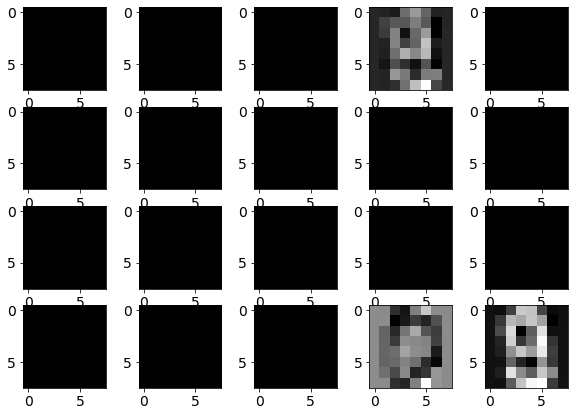

In [14]:
gD = g / np.linalg.norm(g2)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
for k, dk in enumerate(gD):
    plt.subplot(4, 5, k + 1)
    plt.imshow(dk.reshape(8, 8), cmap='gray')

In [15]:
np.allclose(g[-3], g[-2])

False

In [16]:
loss

tensor(0.3464, dtype=torch.float64, grad_fn=<DivBackward0>)